In [1]:
import galsim
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

import numpy as np
from SpecklePSF import SpeckleSeries
import pickle
import pandas as pd

scratchdir = '/global/cscratch1/sd/chebert/'
saveDir = './../Fits/hsmFits/'

# find all image files in the scratch directory
fileNames = ! ls /global/cscratch1/sd/chebert/rawSpeckles/ | grep 'img' 
fileNames = [f for f in fileNames if f not in ['img_a_004.fits', 'img_a_388.fits', 'img_a_389.fits',
                                               'img_b_004.fits', 'img_b_388.fits', 'img_b_389.fits']]
NFiles = len(fileNames)

In [2]:
import helperFunctions as helper
from astropy.io import fits

In [36]:
with open('./../Fits/centerOfMassB.p', 'rb') as file:
    comDictB = pickle.load(file)
with open('./../Fits/fwhmB.p', 'rb') as file:
    fwhmDictB = pickle.load(file)

with open('./../Fits/centerOfMassA.p', 'rb') as file:
    comDictA = pickle.load(file)
with open('./../Fits/fwhmA.p', 'rb') as file:
    fwhmDictA = pickle.load(file)

In [ ]:
centroidDictA = {}
for i in range(int(len(fileNames)/2)):
    file = fileNames[i]
    fileNumber = file.split('.')[0].split('_')[-1]
#     critA = comDictA['img_a_' + fileNumber + '.fits'] + fwhmDictA['img_a_' + fileNumber + '.fits'] <= 128
#     critB = comDictB['img_b_' + fileNumber + '.fits'] + fwhmDictB['img_b_' + fileNumber + '.fits'] <= 128

    hdu = fits.open(scratchdir + 'rawSpeckles/' + file)
    series = hdu[0].data.astype('float64')
    hdu.close()
    centroids = np.zeros((2, 100))

    for i in range(100):
        fit = helper.singleExposureHSM(img=series[i*10], 
                                       maxIters=8000, max_ashift=120, max_amoment=5e6)
        centroids[:,i] = [fit[3].x, fit[3].y]
        
    centroidDictA[file.split('.')[0].split('_')[-1]] = {'x': centroids[0], 'y': centroids[1]}

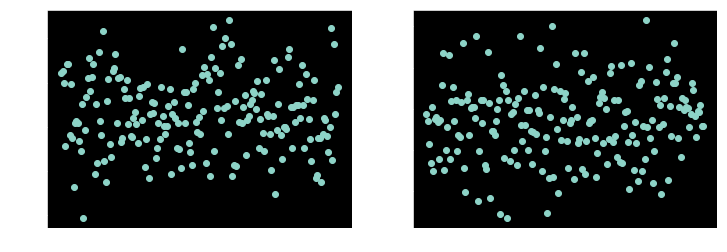

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.ylabel('x')
plt.plot(np.linspace(0,1000,200), centroids[0,:],'o')
plt.subplot(1,2,2)
plt.ylabel('y')
plt.plot(np.linspace(0,1000,200), centroids[1,:],'o')
plt.show()